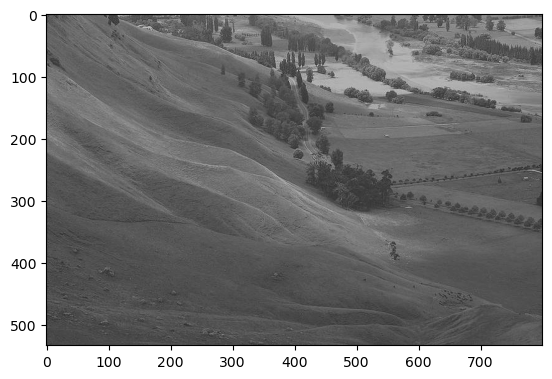

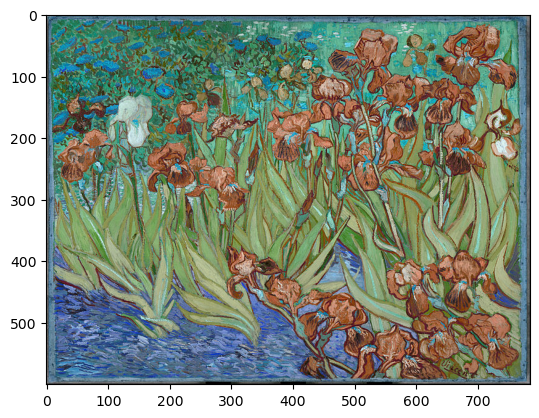

In [1]:
# libraries allowed
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math as m

# use two pictures as reference
# read the image
cinput = cv2.imread('./coding_input.jpg', cv2.IMREAD_GRAYSCALE) # 灰度图像
creference = cv2.imread('./coding_reference.jpg')

# print the image
plt.imshow(cinput, cmap='gray')
plt.show()
plt.imshow(creference)
plt.show()

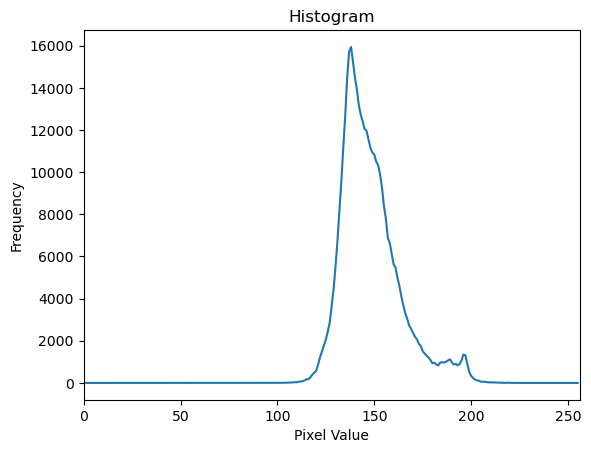

In [2]:
# Display the histograms of the input image and the reference image
# question 1(a)

def histShow(img):
    # calculate the data of graph
    hist, bins = np.histogram(img, bins = 256, range = [0,256])
    # img 图输入
    # bins 分成区间的数量
    # 直方图的值域
    
    # draw the graph
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

# print the picture
'''plt.imshow(cinput, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()'''

# print the histogram
histShow(cinput)



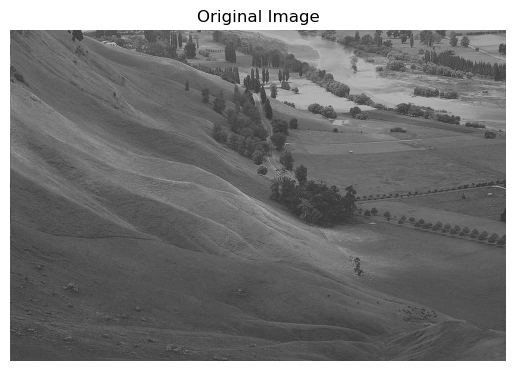

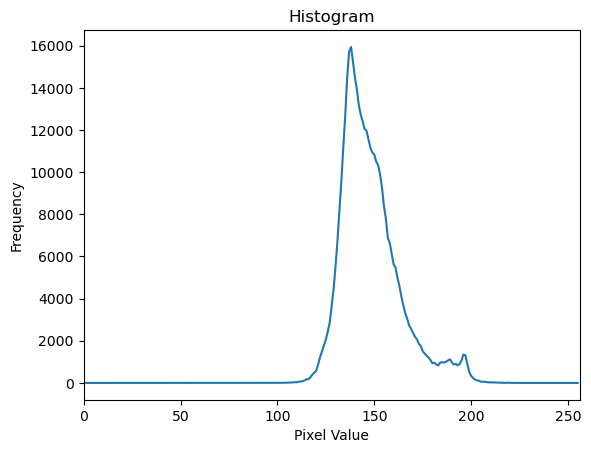

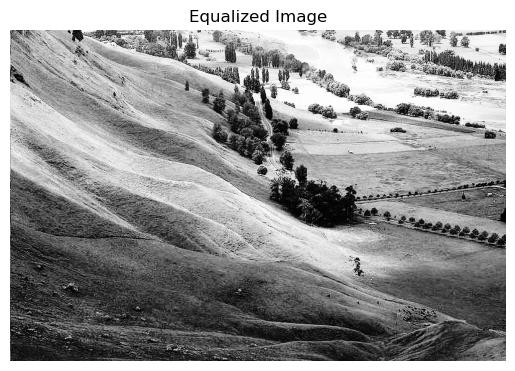

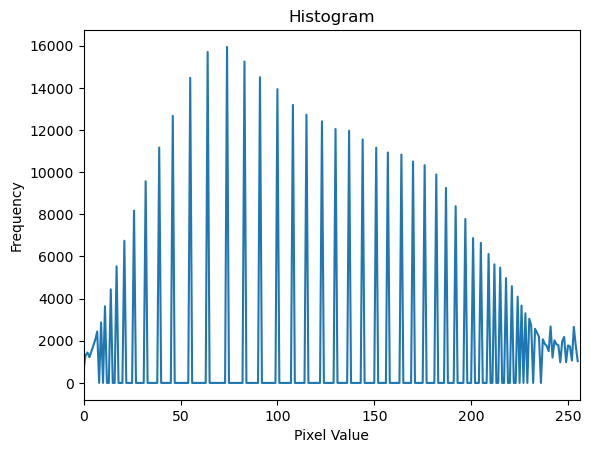

In [3]:
# Perform histogram equalization on the input image, and compare the histogram differences between the input image and output image
# question 1(b)

def histEqual(img):
    # OpenCV histogram equalization
    equ = cv2.equalizeHist(img)
    return equ
# print the old image
plt.imshow(cinput, cmap='gray')
plt.title('Original Image')
plt.axis('off')
histShow(cinput)

# print the new image
hcinput = histEqual(cinput)
plt.imshow(hcinput, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
histShow(hcinput)

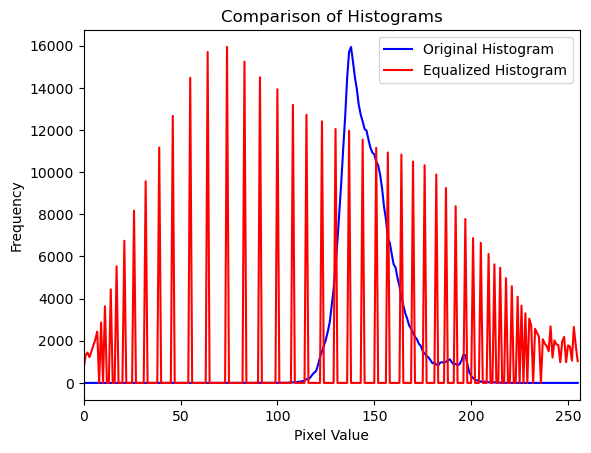

In [4]:
# compare histograms
def compareHistograms(original_img, equalized_img):
    original_hist, _ = np.histogram(original_img.flatten(), bins=256, range=[0, 256])
    equalized_hist, _ = np.histogram(equalized_img.flatten(), bins=256, range=[0, 256])
    
    plt.figure()
    plt.title("Comparison of Histograms")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.plot(original_hist, color='blue', label='Original Histogram')
    plt.plot(equalized_hist, color='red', label='Equalized Histogram')
    plt.xlim([0, 256])
    plt.legend()
    plt.show()


compareHistograms(cinput, hcinput)

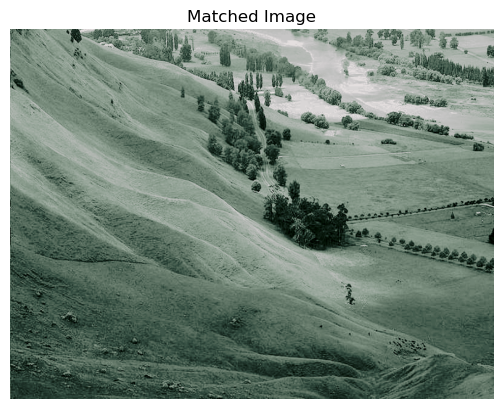

In [8]:
# Perform histogram matching on the RGB channels from the reference image to the input image, and display the output image.
# question 1(c)

def histMatch(img, img_ref):
    
    # 初始化图像
    matched_img = np.zeros_like(img_ref)
    
    # 对RGB每个通道进行直方图匹配
    for i in range(3):  # 对于每个通道
        matched_img[..., i] = match_single_channel(img, img_ref[..., i])
    
    return matched_img

def match_single_channel(img, ref_channel):
    """
    对单个通道进行直方图匹配
    """
    # 计算输入图像和参考图像的直方图和累积分布函数(CDF)
    input_hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    ref_hist, bins = np.histogram(ref_channel.flatten(), bins=256, range=[0, 256])
    
    input_cdf = input_hist.cumsum()
    ref_cdf = ref_hist.cumsum()
    
    # 归一化CDF
    input_cdf = (255 * input_cdf / input_cdf[-1]).astype(np.uint8)
    ref_cdf = (255 * ref_cdf / ref_cdf[-1]).astype(np.uint8)
    
    # 创建查找表
    lookup_table = np.zeros(256, dtype=np.uint8)
    g_j = 0
    for g_i in range(256):
        while g_j < 256 and ref_cdf[g_j] < input_cdf[g_i]:
            g_j += 1
        lookup_table[g_i] = g_j
    
    # 应用查找表
    matched_channel = lookup_table[img]
    
    return matched_channel

cinput_resized = cv2.resize(cinput, (creference.shape[1], creference.shape[0]))


matched_img = histMatch(cinput_resized, creference)

plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Matched Image')
plt.axis('off')
plt.show()